In [1]:
import os
import sys
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import pandas as pd

In [2]:
authentication = pd.read_csv('authentication.csv')
subscription_key = authentication['key'][0]
endpoint = authentication['endpoint'][0]
analyze_url = endpoint + 'vision/v3.0/analyze'

In [3]:
image_path = 'images/scarlett_johansson_3.jpeg'
image_data = open(image_path, 'rb').read()

In [4]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}

# https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fa

# visualFeatures
# Adult, Brands, Categories, Color, Description, Faces, ImageType, Objects, Tags

# details
# Celebrities, Landmarks

# language
# en, es, ja, pt, zh

params = {
    'visualFeatures': 'Categories,Description,Faces',
    # 'details': 'Celebrities,Landmarks',
}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

In [5]:
# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

In [6]:
analysis['categories']

[{'name': 'people_',
  'score': 0.98046875,
  'detail': {'celebrities': [{'name': 'Colin Jost',
     'confidence': 0.9994301199913025,
     'faceRectangle': {'left': 244, 'top': 160, 'width': 60, 'height': 60}},
    {'name': 'Scarlett Johansson',
     'confidence': 0.9779365658760071,
     'faceRectangle': {'left': 308, 'top': 216, 'width': 54, 'height': 54}}]}}]

In [7]:
analysis['description']['tags']

['person',
 'outdoor',
 'building',
 'standing',
 'woman',
 'people',
 'dressed',
 'man',
 'suit',
 'walking',
 'holding',
 'group',
 'wearing',
 'posing',
 'dress',
 'talking',
 'wedding',
 'street',
 'phone',
 'bus',
 'rug']

In [8]:
analysis['faces']

[{'age': 33,
  'gender': 'Male',
  'faceRectangle': {'left': 244, 'top': 160, 'width': 60, 'height': 60}},
 {'age': 32,
  'gender': 'Female',
  'faceRectangle': {'left': 308, 'top': 216, 'width': 54, 'height': 54}},
 {'age': 32,
  'gender': 'Female',
  'faceRectangle': {'left': 650, 'top': 247, 'width': 37, 'height': 37}}]

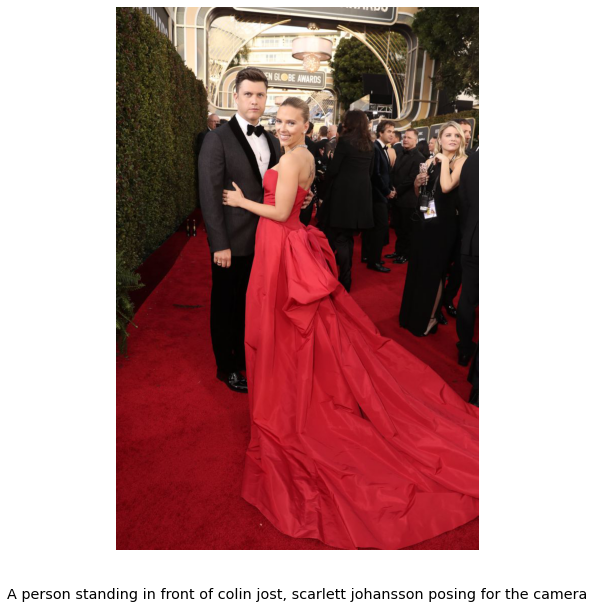

In [9]:
# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
fig = plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()